In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.astype('float')
X_train /= 255

In [ ]:
X_test = X_test.astype('float')
X_test /= 255

In [ ]:
from matplotlib import pyplot as plt

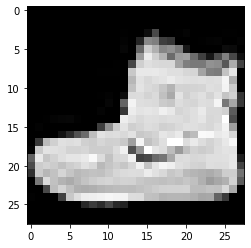

In [ ]:
plt.imshow(X_train[0], cmap='gray')

In [ ]:
import numpy as np


In [ ]:
noise = np.random.normal(loc=0, scale=0.5, size=X_train.shape)
X_train_noisy = X_train + noise
X_train_noisy = np.clip(X_train_noisy, 0, 1)

noise = np.random.normal(loc=0, scale=0.5, size=X_test.shape)
X_test_noisy = X_test + noise
X_test_noisy = np.clip(X_test_noisy, 0, 1)

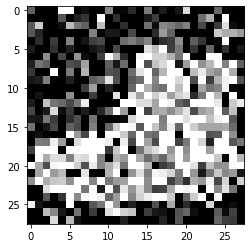

In [ ]:
plt.imshow(X_train_noisy[0], cmap='gray')

In [ ]:
# model = ...

# model.compile(...)

# model.fit(X_train, X_train)

In [ ]:
from keras.layers import Conv2D, Input, Flatten, Dense, Reshape, Conv2DTranspose
import keras.backend as K
from keras import Model

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
# input_shape
inputs = Input(shape=input_shape)

x = Conv2D(filters=16, kernel_size=(3,3), strides=2, padding='same', activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same', activation='relu')(x)

new_shape = K.int_shape(x)
# new_shape

x = Flatten()(x)
# 7*7*32 = 1568
latent_dim = 16
latent = Dense(units=latent_dim)(x)
# shape=16

encoder = Model(inputs, latent, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                25104     
Total params: 29,904
Trainable params: 29,904
Non-trainable params: 0
_________________________________________________________________


In [ ]:
latent_inputs = Input(shape=(latent_dim,))

x = Dense(units=new_shape[1] * new_shape[2] * new_shape[3])(latent_inputs)

x = Reshape((new_shape[1], new_shape[2], new_shape[3]))(x)

x = Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu')(x)
x = Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same', activation='relu')(x)

outputs = Conv2DTranspose(filters=1, kernel_size=3, padding='same', activation='sigmoid')(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1568)              26656     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        4624      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 40,673
Trainable params: 40,673
Non-trainable params: 0
_______________________________________________________

In [ ]:
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                29904     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         40673     
Total params: 70,577
Trainable params: 70,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
history = autoencoder.fit(X_train_noisy, X_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test_noisy, X_test))

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0189 - val_loss: 0.0176
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0172 - val_loss: 0.0171
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0169 - val_loss: 0.0169
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0167 - val_loss: 0.0168
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0165 - val_loss: 0.0167
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0164 - val_loss: 0.0167
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0163 - val_loss: 0.0165
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0162 - val_loss: 0.0164
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0161 - val_loss: 0.0164
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0160 - val_loss: 0.0164

In [ ]:
X_reconstructed = autoencoder.predict(X_test)

In [ ]:
X_reconstructed.shape

(10000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28)

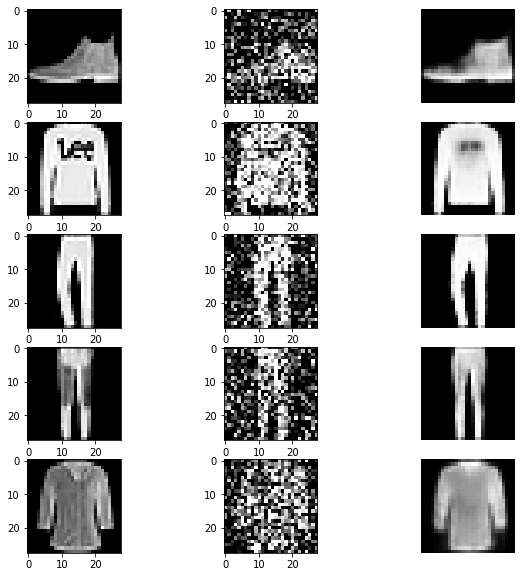

In [ ]:
# code = encoder.predict(X_test)
# code.shape
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,3,i*3+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.subplot(5,3,i*3+2)
    plt.imshow(X_test_noisy[i], cmap='gray')
    plt.subplot(5,3,i*3+3)
    plt.imshow(X_reconstructed[i].reshape(28,28), cmap='gray')
    plt.axis('off')